# Sheet 5

## Examples for linear, sub and super linear convergence

In [17]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(1, 30)
x0 = 1.
alpha = 0.5
alpha_sequence = 1/n

def cummulative_product(sequence):
    rate = 1.
    for k, value in enumerate(sequence):
        sequence[k] *= rate
        rate = sequence[k]
    return sequence

sequences = {
    "linear": x0 * alpha**n,
    "sublinear": x0 * alpha_sequence,
    "superlinear": x0 * cummulative_product(alpha_sequence)
}

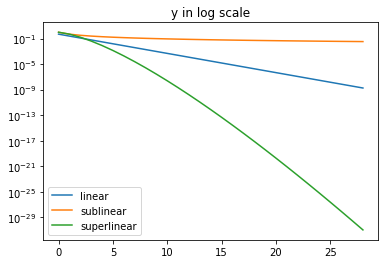

In [18]:
# Log-scale
plt.title("y in log scale")
for key in sequences.keys():
    plt.plot(sequences[key], label=key)
plt.yscale("log")
plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graddesc_test import *

## Ex 2 Gradient Descent 

In [2]:
def constant(alpha=0.001, **kwargs):
    """Constant function
    Parameters:
        alpha: [float], stepsize
        **kwargs: [keyword args] 
    Returns:
        float"""
    return alpha

def exact(f, x, g, d, **kwargs):
    """Exact stepsize in case of f = xQx. 
    This is just for presentation purposes.
    
    Parameters:
        f: callable, Function to be minimized
        x: ndarray, current iterate x
        g: ndarray, current gradient of f() at x
        d: ndarray, current descent direction, e.g. -g
        **kwargs: [keyword args] 
    Returns:
        float"""
    return g@g/f(g)/2

def armijo(f, x, g, d, rho=0.5, c=0.5, alpha=1, **kwargs):
    """Armijo line search 
    
    Parameters:
        f: callable, Function to be minimized
        x: ndarray, current iterate x
        g: ndarray, current gradient of f() at x
        d: ndarray, current descent direction, e.g. -g
        rho: [float], scaling factor of stepsize
        c: [float], factor in minimum decrease condition
        alpha: [float], start step size
        **kwargs: [keyword args] 
    Returns:
        float"""
    f_x = f(x)
    
    gTd = g.dot(d)
    while f(x + alpha*d) > f_x + c*alpha*gTd:
        alpha *= rho
    return alpha

def wolfe(f, x, g, d, rho=0.5, c1=0.5, c2=0.9, alpha=1, **kwargs):
    """Wolfe line search 
    
    Parameters:
        f: callable, function to be minimized
        x: ndarray, current iterate x
        g: ndarray, current gradient of f() at x
        d: ndarray, current descent direction, e.g. -g
        rho: [float], Scaling factor of stepsize
        c1: [float], factor in minimum decrease condition
        c2: [float], factor in curvature condition
        alpha: [float], start step size
        **kwargs: [keyword args] 
    Returns:
        float"""
    maxit = 1000
    f_x = f(x)
    gradTd = g.dot(d)
    
    is_wolfeViolated = True
    for _ in range(maxit):
        
        g_new = grad(f, x + alpha*d)
        is_minimumDecrease = f(x + alpha*d) < f_x + c1*alpha*gradTd
        is_curvatureCondition = g_new@d > c2*gradTd
        
        # If both conditions are fulfilled we return alpha
        if (is_minimumDecrease and is_curvatureCondition):
            return alpha
        
        # If minimul decerass is violated we decrease alpha
        # and again check the conditions
        if not is_minimumDecrease:
            alpha *= rho
            continue
            
        # If the curvature condition is violated we decrease alpha
        # and again check the conditions    
        if not is_curvatureCondition:
            alpha *= 1+rho
            continue

def gradientdescent(f, x, tol=1e-9, maxit=2000, callback=None, method="armijo"):
    """Gradient descent algorithm
    
    Parameters:
        f: callable, function to be minimized
        x: ndarray, start value
        tol: [float], gradient norm tolerance
        maxit: [int], maximum number of iterations
        callback: [callable], Callback function
        method: [string], Method arimjo, wolfe, constant
    """
    if method=="constant":
        linesearch = constant
    elif method=="armijo":
        linesearch = armijo
    elif method=="wolfe":
        linesearch = wolfe
    elif method=="exact":
        linesearch = exact
    else:
        raise ValueError("No such linesearch method: " + method)
        
    for k in range(maxit):
        g = grad(f, x)
        d = -g
        alpha = linesearch(f=f, x=x, g=g, d=d)
        if not callback is None:
            callback(x)
        x += alpha*d
        gnorm = np.linalg.norm(g)
        if gnorm<tol:
            return x
    print("Optimization not successful! Reached maxit (",maxit,").", sep="")
    return x

In [3]:
test(gradientdescent)

Optimization not successful! Reached maxit (2000).
Method:  constant 	x =  [ 0. -0.]
Method:  armijo 	x =  [ 0. -0.]
Method:  wolfe 	x =  [ 0. -0.]


Optimization not successful! Reached maxit (2000).
Iterations:  2000
Solution:  [ 2.0125150e-09 -4.4700492e-11]


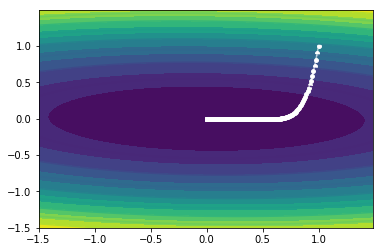

In [4]:
callback = CallBack()
x0 = np.ones(2)
gradientdescent(f, x0, callback=callback, method="constant")
print("Iterations: ", len(callback.xk))
print("Solution: ", callback.xk[-1])
callback.plot(f)

Iterations:  103
Solution:  [6.39449213e-11 2.60922647e-12]


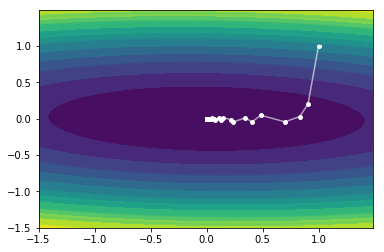

In [5]:
callback = CallBack()
x0 = np.ones(2)
gradientdescent(f, x0, callback=callback, method="armijo")
print("Iterations: ", len(callback.xk))
print("Solution: ", callback.xk[-1])
callback.plot(f)

Iterations:  103
Solution:  [6.39449213e-11 2.60922647e-12]


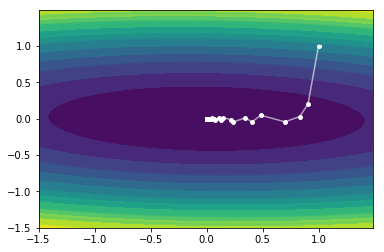

In [6]:
callback = CallBack()
x0 = np.ones(2)
gradientdescent(f, x0, callback=callback, method="wolfe")
print("Iterations: ", len(callback.xk))
print("Solution: ", callback.xk[-1])
callback.plot(f)

Iterations:  37
Solution:  [5.50854702e-11 3.36601117e-22]


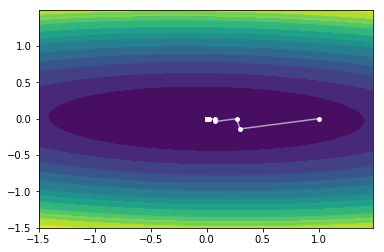

In [7]:
callback = CallBack()
x0 = np.array([1.,0.])
gradientdescent(f, x0, callback=callback, method="exact")
print("Iterations: ", len(callback.xk))
print("Solution: ", callback.xk[-1])
callback.plot(f)